# DAL DATASET ALL'ALGORITMO: COME SI SVILLUPA UN MODELLO?

In questa esercitazione viene mostrato come da un semplice Dataset (in questo caso scaricato da Internet dalla community di Kaggle, https://www.kaggle.com/?utm_source=homescreen) si riesce a sviluppare un modello (quindi un algoritmo) per prevedere una o più variabili target. Per fare questo bisogna prima però eseguire dei passaggi preliminari che son fondamentali per la cura e la precisione del modello finale (come ad esempio quelli di gestire i NaN e gli Outliers)

## FASE 1: SCEGLIERE (O CREARE), IMPORTARE E SALVARE IL DATASET

1) SCARICARE IL DATASET E INSERIRLO IN UN PATH (PER COMODITA LO METTO NELLA STESSA CARTELLA)
2) IMPORTARE LE LIBRERIE NECESSARIE: PANDAS (PER LEGGERE IL DATASET) E OS (PER GESTIRE I PATH)
3) IMPORTARE IL DATASET USANDO LE FUNZIONI DI PANDAS


In [1]:
import pandas  as pd # Importare la libreria "Pandas" per poter gestire i Dataset
import os # Importare la libreria "os" per gestire i path

# Per importare il Dataset possiamo usare due funzione di Pandas:
# 1) pd.read_csv(): per leggere il file CSV (comma separated values)
# 2) pd.read_excel(): per leggere i file Excel

path_dataset = r"C:\Users\matte\OneDrive - Scuola Paritaria S. Freud SRL\Desktop\FREUD\2D\QUADERNI E ALTRO\ROBOTICA ED AI\ESERCIZI IN CLASSE PYTHON\ds_salaries.csv" # Il prefisso "r" serve per evitare che ci siano confusioni nell'interpretazione della stringa, come ad esempio: numeri, caratteri speciali e backslash
dataset = pd.read_csv(path_dataset)

## FASE 2: VISUALIZZAZIONE E ANALISI DEL DATASET (CON GRAFICI)

1) STAMPARE IL DATASET
2) PER OGNI FEATURE ANALIZZARE COME SIA COMPOSTA: CIOè CHE VALORI HA NEL DETTAGLIO (TIPO UNITà DI MISURA O VALUTE)
3) ANALIZZARE COSA SIA MEGLIO TENERE O COSA INVECE è MEGLIO BUTTARE

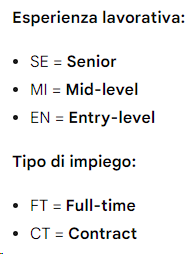

In [2]:
dataset # Stampare il Dataset serve per poterlo analizzare nel dettaglio meglio, come ad esempio visualizzare le Feature e le istanze per decidere cose sia meglio tenere e cosa invece sia meglio eliminare
# Scrivendo solo il nome del dataset, quest'ultimo si stamperà (solo la parte iniziale e finale)

,work_year,experience_level,employment_type,job_title,salary,salary_currency,salary_in_usd,employee_residence,remote_ratio,company_location,company_size
0,2023,SE,FT,Principal Data Scientist,80000,EUR,85847,ES,100,ES,L
1,2023,MI,CT,ML Engineer,30000,USD,30000,US,100,US,S
2,2023,MI,CT,ML Engineer,25500,USD,25500,US,100,US,S
3,2023,SE,FT,Data Scientist,175000,USD,175000,CA,100,CA,M
4,2023,SE,FT,Data Scientist,120000,USD,120000,CA,100,CA,M
...,...,...,...,...,...,...,...,...,...,...,...
3750,2020,SE,FT,Data Scientist,412000,USD,412000,US,100,US,L
3751,2021,MI,FT,Principal Data Scientist,151000,USD,151000,US,100,US,L
3752,2020,EN,FT,Data Scientist,105000,USD,105000,US,100,US,S
3753,2020,EN,CT,Business Data Analyst,100000,USD,100000,US,100,US,L


In [3]:
# Stampare i valori unici (unique), nonchè tutti i possibili output per ogni Feature, serve per analizzare meglio il Dataset nel dettaglio di ogni Feature e capire così tutti i possibili ambiti
print("I valori di work_year sono:") # All'inizio viene stampata una stringa di testo esplicativa
print(dataset["work_year"].unique()) # Poi si stampano i veri e propri valori unici
print("I valori di experience_level sono:")
print(dataset["experience_level"].unique())
print("I valori di employment_type sono:")
print(dataset["employment_type"].unique())
print("I valori di job_title sono:")
print(dataset["job_title"].unique())
print("I valori di salary sono:")
print(dataset["salary"].unique())
print("I valori di salary_currency sono:")
print(dataset["salary_currency"].unique())
print("I valori di salary_in_usd sono:")
print(dataset["salary_in_usd"].unique())
print("I valori di employee_residence sono:")
print(dataset["employee_residence"].unique())
print("I valori di remote_ratio sono:")
print(dataset["remote_ratio"].unique())
print("I valori di company_location sono:")
print(dataset["company_location"].unique())
print("I valori di company_size sono:")
print(dataset["company_size"].unique())

I valori di work_year sono:
[2023 2022 2020 2021]
I valori di experience_level sono:
['SE' 'MI' 'EN' 'EX']
I valori di employment_type sono:
['FT' 'CT' 'FL' 'PT']
I valori di job_title sono:
['Principal Data Scientist' 'ML Engineer' 'Data Scientist'
 'Applied Scientist' 'Data Analyst' 'Data Modeler' 'Research Engineer'
 'Analytics Engineer' 'Business Intelligence Engineer'
 'Machine Learning Engineer' 'Data Strategist' 'Data Engineer'
 'Computer Vision Engineer' 'Data Quality Analyst'
 'Compliance Data Analyst' 'Data Architect'
 'Applied Machine Learning Engineer' 'AI Developer' 'Research Scientist'
 'Data Analytics Manager' 'Business Data Analyst' 'Applied Data Scientist'
 'Staff Data Analyst' 'ETL Engineer' 'Data DevOps Engineer' 'Head of Data'
 'Data Science Manager' 'Data Manager' 'Machine Learning Researcher'
 'Big Data Engineer' 'Data Specialist' 'Lead Data Analyst'
 'BI Data Engineer' 'Director of Data Science'
 'Machine Learning Scientist' 'MLOps Engineer' 'AI Scientist'
 'Auto

## FASE 3: MODIFICA DEL DATASET

1) VOGLIAMO MODIFICARE IL DATASET CONSIDERANDO SOLO TRE FEATURES E CON TUTTI I SALARI IN DOLLARI 
2) ELIMINARE LE FEATURE INUTILI AL NOSTRO ALGORITMO FINALE
3) SALVARE SOVRASCRIVENDO IL DATASET
4) STAMPARE IL NUOVO DATASET PER VERIFICARE SE LE OPERAZIONE FATTE PRECEDENENTE HANNO AVUTO UN SEGUITO POSITIVO

TUTTE LE MODIFICHE VENGONO FATTE SU UN DATASET CLONE, IN MODO POI DA POTERLO COMPARARE CON L'ORIGINALE

In [4]:
job_titles = ['Data Scientist', 'Machine Learning Engineer', 'Data Analyst', 'Data Engineer', 'Data Architect', 'Business Intelligence Engineer', 'Data Strategist', 'Data Quality Analyst', 'Data Science Manager', 'Data Operations Engineer']
print(len(job_titles))
dataset_ridotto = dataset[dataset['job_title'].isin(job_titles)]
dataset_ridotto["job_title"].unique() # Controllare che l'unico valore

10


array(['Data Scientist', 'Data Analyst', 'Business Intelligence Engineer',
       'Machine Learning Engineer', 'Data Strategist', 'Data Engineer',
       'Data Quality Analyst', 'Data Architect', 'Data Science Manager',
       'Data Operations Engineer'], dtype=object)

In [5]:
print("I valori di job_title sono:")
print(dataset_ridotto["job_title"].unique())

I valori di job_title sono:
['Data Scientist' 'Data Analyst' 'Business Intelligence Engineer'
 'Machine Learning Engineer' 'Data Strategist' 'Data Engineer'
 'Data Quality Analyst' 'Data Architect' 'Data Science Manager'
 'Data Operations Engineer']


In [6]:
dataset_ridotto=dataset[dataset["salary_currency"] == "USD"] # Filtrare le righe (istanze) del dataset in cui i valori di salary currency è "USD"
dataset_ridotto["salary_currency"].unique() # Controllare che l'unico valore in salary currency sia "USD"

array(['USD'], dtype=object)

In [7]:
print("I valori di salary_currency sono:")
print(dataset_ridotto["salary_currency"].unique())

I valori di salary_currency sono:
['USD']


In [8]:
dataset_ridotto=dataset[dataset["company_location"] == "US"] # Filtrare le righe (istanze) del dataset in cui i valori di company location è "US"
dataset_ridotto["company_location"].unique() # Controllare che l'unico valore in company location sia "US"

array(['US'], dtype=object)

In [9]:
print("I valori di company_location sono:")
print(dataset_ridotto["company_location"].unique())

I valori di company_location sono:
['US']


In [10]:
dataset_ridotto=dataset_ridotto[dataset_ridotto["work_year"] == 2023] # Filtrare le righe (istanze) del dataset
dataset_ridotto["work_year"].unique() # Controllare che l'unico valore

array([2023], dtype=int64)

In [11]:
print("I valori di work_year sono:")
print(dataset_ridotto["work_year"].unique())

I valori di work_year sono:
[2023]


In [12]:
dataset=dataset[dataset["work_year"] == 2023] # Filtrare le righe (istanze) del dataset in cui i valori di work_year è "2023"
dataset["work_year"].unique() # Controllare che l'unico valore in work_year è "2023"

array([2023], dtype=int64)

In [13]:
print("I valori di work_year sono:")
print(dataset["work_year"].unique())

I valori di work_year sono:
[2023]


In [14]:
dataset_ridotto = dataset_ridotto[["experience_level","job_title","salary","company_location"]] # Filtrare solo le features scelte e il target (salary). Le altre features non scritte veranno eliminate
dataset_ridotto

,experience_level,job_title,salary,company_location
1,MI,ML Engineer,30000,US
2,MI,ML Engineer,25500,US
5,SE,Applied Scientist,222200,US
6,SE,Applied Scientist,136000,US
9,SE,Data Scientist,147100,US
...,...,...,...,...
1815,SE,Machine Learning Engineer,134500,US
1817,MI,Data Scientist,130000,US
1818,MI,Data Scientist,90000,US
1819,EN,Data Engineer,160000,US


In [15]:
dataset = dataset[["experience_level","job_title","salary","company_location"]] # Filtrare solo le features scelte e il target (salary). Le altre features non scritte veranno eliminate
dataset

,experience_level,job_title,salary,company_location
0,SE,Principal Data Scientist,80000,ES
1,MI,ML Engineer,30000,US
2,MI,ML Engineer,25500,US
3,SE,Data Scientist,175000,CA
4,SE,Data Scientist,120000,CA
...,...,...,...,...
1815,SE,Machine Learning Engineer,134500,US
1817,MI,Data Scientist,130000,US
1818,MI,Data Scientist,90000,US
1819,EN,Data Engineer,160000,US


## FASE 4: LE DISTRIBUZIONI E I GRAFICI SULLE MODIFICHE DEL DATASET RISPETTO AL DATASET ORIGINALE

1) CONFRONTIAMO LE DISTRIBUZIONE DEI TITOLI DI LAVORI "MONDIALE" VS CON QUELLA AMERICANA

In [16]:
from matplotlib import pyplot as plt

persone_totali = len(dataset)

# Calcolare le percentuali dei titoli di lavoro mondiali rispetto ad una singola categoria di lavoro

# Calcolare percentuali di "Data Scientist" mondiali

DataScientist_mondiali = dataset[dataset["job_title"]=="Data Scientist"]
numero_DataScientist_mondiali = len(DataScientist_mondiali)
percentuale_DataScientist_mondiali = numero_DataScientist_mondiali/persone_totali*100

# Calcolare percentuali di "Machine Learning Engineer" mondiali

Machine_Learning_Engineer_mondiali = dataset[dataset["job_title"]=="Machine Learning Engineer"]
numero_Machine_Learning_Engineer_mondiali = len(Machine_Learning_Engineer_mondiali)
percentuale_Machine_Learning_Engineer_mondiali = numero_Machine_Learning_Engineer_mondiali/persone_totali*100

# Calcolare percentuali di "Data Analyst" mondiali

Data_Analyst_mondiali = dataset[dataset["job_title"]=="Data Analyst"]
numero_Data_Analyst_mondiali = len(Data_Analyst_mondiali)
percentuale_Data_Analyst_mondiali = numero_Data_Analyst_mondiali/persone_totali*100

# Calcolare percentuali di "Data Engineer" mondiali

Data_Engineer_mondiali = dataset[dataset["job_title"]=="Data Engineer"]
numero_Data_Engineer_mondiali = len(Data_Engineer_mondiali)
percentuale_Data_Engineer_mondiali = numero_Data_Engineer_mondiali/persone_totali*100

# Calcolare percentuali di "Data Architect" mondiali

Data_Architect_mondiali = dataset[dataset["job_title"]=="Data Architect"]
numero_Data_Architect_mondiali = len(Data_Architect_mondiali)
percentuale_Data_Architect_mondiali = numero_Data_Architect_mondiali/persone_totali*100

# Calcolare percentuali di "Business Intelligence Engineer" mondiali

Business_Intelligence_Engineer_mondiali = dataset[dataset["job_title"]=="Business Intelligence Engineer"]
numero_Business_Intelligence_Engineer_mondiali = len(Business_Intelligence_Engineer_mondiali)
percentuale_Business_Intelligence_Engineer_mondiali = numero_Business_Intelligence_Engineer_mondiali/persone_totali*100

# Calcolare percentuali di "Data Strategist" mondiali

Data_Strategist_mondiali = dataset[dataset["job_title"]=="Data Strategist"]
numero_Data_Strategist_mondiali = len(Data_Strategist_mondiali)
percentuale_Data_Strategist_mondiali = numero_Data_Strategist_mondiali/persone_totali*100

# Calcolare percentuali di "Data Quality Analyst" mondiali

Data_Quality_Analyst_mondiali = dataset[dataset["job_title"]=="Data Quality Analyst"]
numero_Data_Quality_Analyst_mondiali = len(Data_Quality_Analyst_mondiali)
percentuale_Data_Quality_Analyst_mondiali = numero_Data_Quality_Analyst_mondiali/persone_totali*100

# Calcolare percentuali di "Data Science Manager" mondiali

Data_Science_Manager_mondiali = dataset[dataset["job_title"]=="Data Science Manager"]
numero_Data_Science_Manager_mondiali = len(Data_Science_Manager_mondiali)
percentuale_Data_Science_Manager_mondiali = numero_Data_Science_Manager_mondiali/persone_totali*100

# Calcolare percentuali di "Data Operations Engineer" mondiali

Data_Operations_Engineer_mondiali = dataset[dataset["job_title"]=="Data Operations Engineer"]
numero_Data_Operations_Engineer_mondiali = len(Data_Operations_Engineer_mondiali)
percentuale_Data_Operations_Engineer_mondiali = numero_Data_Operations_Engineer_mondiali/persone_totali*100

In [17]:
from matplotlib import pyplot as plt

persone_totali = len(dataset_ridotto)

# Calcolare le percentuali dei titoli di lavoro americani rispetto ad una singola categoria di lavoro

# Calcolare percentuali di "Data Scientist" americani

DataScientist_americani = dataset_ridotto[dataset_ridotto["job_title"]=="Data Scientist"]
numero_DataScientist_americani = len(DataScientist_americani)
percentuale_DataScientist_americani = numero_DataScientist_americani/persone_totali*100

# Calcolare percentuali di "Machine Learning Engineer" americani

Machine_Learning_Engineer_americani = dataset_ridotto[dataset_ridotto["job_title"]=="Machine Learning Engineer"]
numero_Machine_Learning_Engineer_americani = len(Machine_Learning_Engineer_americani)
percentuale_Machine_Learning_Engineer_americani = numero_Machine_Learning_Engineer_americani/persone_totali*100

# Calcolare percentuali di "Data Analyst" americani

Data_Analyst_americani = dataset_ridotto[dataset_ridotto["job_title"]=="Data Analyst"]
numero_Data_Analyst_americani = len(Data_Analyst_americani)
percentuale_Data_Analyst_americani = numero_Data_Analyst_americani/persone_totali*100

# Calcolare percentuali di "Data Engineer" americani

Data_Engineer_americani = dataset_ridotto[dataset_ridotto["job_title"]=="Data Engineer"]
numero_Data_Engineer_americani = len(Data_Engineer_americani)
percentuale_Data_Engineer_americani = numero_Data_Engineer_americani/persone_totali*100

# Calcolare percentuali di "Data Architect" americani

Data_Architect_americani = dataset_ridotto[dataset_ridotto["job_title"]=="Data Architect"]
numero_Data_Architect_americani = len(Data_Architect_americani)
percentuale_Data_Architect_americani = numero_Data_Architect_americani/persone_totali*100

# Calcolare percentuali di "Business Intelligence Engineer" americani

Business_Intelligence_Engineer_americani = dataset_ridotto[dataset_ridotto["job_title"]=="Business Intelligence Engineer"]
numero_Business_Intelligence_Engineer_americani = len(Business_Intelligence_Engineer_americani)
percentuale_Business_Intelligence_Engineer_americani = numero_Business_Intelligence_Engineer_americani/persone_totali*100

# Calcolare percentuali di "Data Strategist" americani

Data_Strategist_americani = dataset_ridotto[dataset_ridotto["job_title"]=="Data Strategist"]
numero_Data_Strategist_americani = len(Data_Strategist_americani)
percentuale_Data_Strategist_americani = numero_Data_Strategist_americani/persone_totali*100

# Calcolare percentuali di "Data Quality Analyst" americani

Data_Quality_Analyst_americani = dataset_ridotto[dataset_ridotto["job_title"]=="Data Quality Analyst"]
numero_Data_Quality_Analyst_americani = len(Data_Quality_Analyst_americani)
percentuale_Data_Quality_Analyst_americani = numero_Data_Quality_Analyst_americani/persone_totali*100

# Calcolare percentuali di "Data Science Manager" americani

Data_Science_Manager_americani = dataset_ridotto[dataset_ridotto["job_title"]=="Data Science Manager"]
numero_Data_Science_Manager_americani = len(Data_Science_Manager_americani)
percentuale_Data_Science_Manager_americani = numero_Data_Science_Manager_americani/persone_totali*100

# Calcolare percentuali di "Data Operations Engineer" americani

Data_Operations_Engineer_americani = dataset_ridotto[dataset_ridotto["job_title"]=="Data Operations Engineer"]
numero_Data_Operations_Engineer_americani = len(Data_Operations_Engineer_americani)
percentuale_Data_Operations_Engineer_americani = numero_Data_Operations_Engineer_americani/persone_totali*100

In [18]:
print("Le percentuali mondiali di \"Data Scientist\" sono:")
print(percentuale_DataScientist_mondiali)
print("Le percentuali mondiali di \"Machine Learning Engineer\" sono:")
print(percentuale_Machine_Learning_Engineer_mondiali)
print("Le percentuali mondiali di \"Data Analyst\" sono:")
print(percentuale_Data_Analyst_mondiali)
print("Le percentuali mondiali di \"Data Engineer\" sono:")
print(percentuale_Data_Engineer_mondiali)
print("Le percentuali mondiali di \"Data Architect\" sono:")
print(percentuale_Data_Architect_mondiali)
print("Le percentuali mondiali di \"Business Intelligence Engineer\" sono:")
print(percentuale_Business_Intelligence_Engineer_mondiali)
print("Le percentuali mondiali di \"Data Strategist\" sono:")
print(percentuale_Data_Strategist_mondiali)
print("Le percentuali mondiali di \"Data Quality Analyst\" sono:")
print(percentuale_Data_Quality_Analyst_mondiali)
print("Le percentuali mondiali di \"Data Science Manager\" sono:")
print(percentuale_Data_Science_Manager_mondiali)
print("Le percentuali mondiali di \"Data Operations Engineer\" sono:")
print(percentuale_Data_Operations_Engineer_mondiali)

Le percentuali mondiali di "Data Scientist" sono:
20.72829131652661
Le percentuali mondiali di "Machine Learning Engineer" sono:
8.8515406162465
Le percentuali mondiali di "Data Analyst" sono:
17.198879551820728
Le percentuali mondiali di "Data Engineer" sono:
27.955182072829132
Le percentuali mondiali di "Data Architect" sono:
2.9131652661064424
Le percentuali mondiali di "Business Intelligence Engineer" sono:
0.22408963585434172
Le percentuali mondiali di "Data Strategist" sono:
0.11204481792717086
Le percentuali mondiali di "Data Quality Analyst" sono:
0.39215686274509803
Le percentuali mondiali di "Data Science Manager" sono:
1.2324929971988796
Le percentuali mondiali di "Data Operations Engineer" sono:
0.11204481792717086


In [19]:
print("Le percentuali americane di \"Data Scientist\" sono:")
print(percentuale_DataScientist_americani)
print("Le percentuali americane di \"Machine Learning Engineer\" sono:")
print(percentuale_Machine_Learning_Engineer_americani)
print("Le percentuali americane di \"Data Analyst\" sono:")
print(percentuale_Data_Analyst_americani)
print("Le percentuali americane di \"Data Engineer\" sono:")
print(percentuale_Data_Engineer_americani)
print("Le percentuali americane di \"Data Architect\" sono:")
print(percentuale_Data_Architect_americani)
print("Le percentuali americane di \"Business Intelligence Engineer\" sono:")
print(percentuale_Business_Intelligence_Engineer_americani)
print("Le percentuali americane di \"Data Strategist\" sono:")
print(percentuale_Data_Strategist_americani)
print("Le percentuali americane di \"Data Quality Analyst\" sono:")
print(percentuale_Data_Quality_Analyst_americani)
print("Le percentuali americane di \"Data Science Manager\" sono:")
print(percentuale_Data_Science_Manager_americani)
print("Le percentuali americane di \"Data Operations Engineer\" sono:")
print(percentuale_Data_Operations_Engineer_americani)

Le percentuali americane di "Data Scientist" sono:
20.127388535031848
Le percentuali americane di "Machine Learning Engineer" sono:
8.535031847133757
Le percentuali americane di "Data Analyst" sono:
17.51592356687898
Le percentuali americane di "Data Engineer" sono:
30.063694267515924
Le percentuali americane di "Data Architect" sono:
3.1847133757961785
Le percentuali americane di "Business Intelligence Engineer" sono:
0.25477707006369427
Le percentuali americane di "Data Strategist" sono:
0.0
Le percentuali americane di "Data Quality Analyst" sono:
0.3821656050955414
Le percentuali americane di "Data Science Manager" sono:
1.2738853503184715
Le percentuali americane di "Data Operations Engineer" sono:
0.12738853503184713


In [20]:
# con
percentuale_totale_mondiale = percentuale_Data_Analyst_mondiali + percentuale_Data_Engineer_mondiali + percentuale_DataScientist_mondiali + percentuale_Data_Architect_mondiali + percentuale_Data_Quality_Analyst_mondiali + percentuale_Data_Science_Manager_mondiali + percentuale_Data_Operations_Engineer_mondiali + percentuale_Machine_Learning_Engineer_mondiali + percentuale_Business_Intelligence_Engineer_mondiali + percentuale_Data_Strategist_mondiali
print(f"La percentuale totale mondiale è pari a: {int(percentuale_totale_mondiale)}%")

La percentuale totale mondiale è pari a: 79%


In [21]:
# con
percentuale_totale_americana = percentuale_Data_Analyst_americani + percentuale_Data_Engineer_americani + percentuale_DataScientist_americani + percentuale_Data_Architect_americani + percentuale_Data_Quality_Analyst_americani + percentuale_Data_Science_Manager_americani + percentuale_Data_Operations_Engineer_americani + percentuale_Machine_Learning_Engineer_americani + percentuale_Business_Intelligence_Engineer_americani + percentuale_Data_Strategist_americani
print(f"La percentuale totale americana è pari a: {int(percentuale_totale_americana)}%")

La percentuale totale americana è pari a: 81%


10


<Figure size 640x480 with 0 Axes>

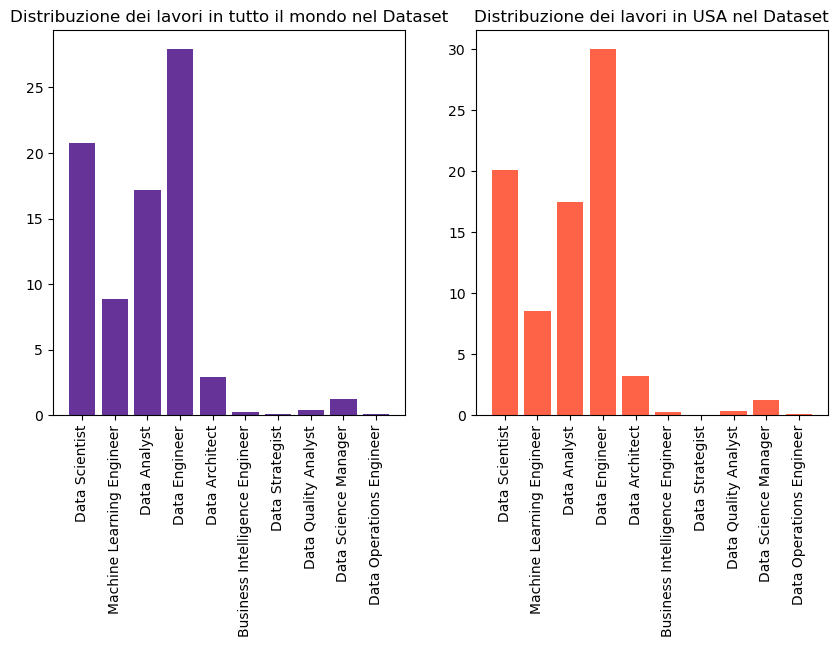

In [22]:
labels = job_titles
percentuali_mondiali = [percentuale_DataScientist_mondiali, percentuale_Machine_Learning_Engineer_mondiali, percentuale_Data_Analyst_mondiali, percentuale_Data_Engineer_mondiali, percentuale_Data_Architect_mondiali, percentuale_Business_Intelligence_Engineer_mondiali, percentuale_Data_Strategist_mondiali, percentuale_Data_Quality_Analyst_mondiali, percentuale_Data_Science_Manager_mondiali, percentuale_Data_Operations_Engineer_mondiali]
print(len(percentuali_mondiali))
plt.figure()
fig,axs = plt.subplots(1,2,figsize=(10,5))
axs[0].set_title("Distribuzione dei lavori in tutto il mondo nel Dataset")
axs[0].bar(labels,percentuali_mondiali, color="rebeccapurple")
axs[0].tick_params(axis='x',rotation=90)

percentuali_americani = [percentuale_DataScientist_americani, percentuale_Machine_Learning_Engineer_americani, percentuale_Data_Analyst_americani, percentuale_Data_Engineer_americani, percentuale_Data_Architect_americani, percentuale_Business_Intelligence_Engineer_americani, percentuale_Data_Strategist_americani, percentuale_Data_Quality_Analyst_americani, percentuale_Data_Science_Manager_americani, percentuale_Data_Operations_Engineer_americani]

axs[1].set_title("Distribuzione dei lavori in USA nel Dataset")
axs[1].bar(labels,percentuali_americani, color="tomato")
axs[1].tick_params(axis='x',rotation=90)

plt.show()

## FASE 5: LE CORRELAZIONI TRA TUTTE LE FEATURES E IL SALARIO (CON LA MATRICE DI CORRELAZIONE)

In [23]:
dataset.corr()

C:\Users\matte\AppData\Local\Temp\ipykernel_34736\2191645083.py:1: FutureWarning: The default value of numeric_only in DataFrame.corr is deprecated. In a future version, it will default to False. Select only valid columns or specify the value of numeric_only to silence this warning.
  dataset.corr()


,salary
salary,1.0


NON HO DELLE VARIABILI NUMERICHE PER FARE LA CORRELAZIONE, HO SOLO DEI VALORI NUMERICI PER LA FEATURE SALARY ED è PER QUESTO CHE NON MI VIENE LA MATRICE DI CORRELAZIONE

## FASE 6: L'ANALISI DELLA PRESENZA DI NAN NEL DATASET, LA GESTIONE DI QUEST'ULTIMI ED EVENTUALI GRAFICI

In [24]:
# Calcolo del totale delle righe con dati mancanti
totale_dati_mancanti_dataset = dataset.isnull().any(axis=1).sum() # Calcola il totale delle righe con almeno un dato mancante

# Determinazione delle colonne con dati mancanti
colonne_dati_mancanti_dataset = dataset.isnull().any(axis=0) # True se almeno un valore nella colonna è mancante (None o NaN)

In [25]:
# Stampa delle colonne con dati mancanti e del totale dei dati mancanti
print("Colonne con dati mancanti nel Dataset originale:")
print(colonne_dati_mancanti_dataset)
print(f"Totale delle righe con dati mancanti nel Dataset originale: {totale_dati_mancanti_dataset}")

Colonne con dati mancanti nel Dataset originale:
experience_level    False
job_title           False
salary              False
company_location    False
dtype: bool
Totale delle righe con dati mancanti nel Dataset originale: 0


In [26]:
# Calcolo del totale delle righe con dati mancanti
totale_dati_mancanti_dataset_ridotto = dataset_ridotto.isnull().any(axis=1).sum() # Calcola il totale delle righe con almeno un dato mancante

# Determinazione delle colonne con dati mancanti
colonne_dati_mancanti_dataset_ridotto = dataset_ridotto.isnull().any(axis=0) # True se almeno un valore nella colonna è mancante (None o NaN)

In [27]:
# Stampa delle colonne con dati mancanti e del totale dei dati mancanti
print("Colonne con dati mancanti nel Dataset ridotto:")
print(colonne_dati_mancanti_dataset_ridotto)
print(f"Totale delle righe con dati mancanti nel Dataset ridotto: {totale_dati_mancanti_dataset_ridotto}")

Colonne con dati mancanti nel Dataset ridotto:
experience_level    False
job_title           False
salary              False
company_location    False
dtype: bool
Totale delle righe con dati mancanti nel Dataset ridotto: 0


## FASE 7: L'ANALISI DELLA PRESENZA DI OUTLIERS NEL DATASET, LA GESTIONE DI QUEST'ULTIMI ED EVENTUALI GRAFICI

In [28]:
# la formula è: σ = √(Σ(xi - x̄)² / n)
    # √ = radice quadrata
    # Σ = sommatoria di tutti gli elementi dentro la parentesi quadra
    # xi = sono i singoli valori dei dati
    # x̄ = è la media dei dati
    # n = è il numero totale di dati

In [29]:
# Calcolare la media del Dataset
mean_value_dataset = dataset["salary"].mean()
print("La media dei valori del Dataset originario è: ")
print(mean_value_dataset)

La media dei valori del Dataset originario è: 
160381.4806722689


In [30]:
# Calcolare la media del Dataset ridotto
mean_value_dataset_ridotto = dataset_ridotto["salary"].mean()
print("La media dei valori del Dataset ridotto è: ")
print(mean_value_dataset_ridotto)

La media dei valori del Dataset ridotto è: 
156784.98089171975


In [31]:
# Calcolare la deviazione standard del Dataset
std_dev_dataset = dataset["salary"].std()
print("La deviazione standard del Dataset originario è: ")
print(std_dev_dataset)

La deviazione standard del Dataset originario è: 
162009.12823787233


In [32]:
# Calcolare la deviazione standard del Dataset ridotto
std_dev_dataset_ridotto = dataset_ridotto["salary"].std()
print("La deviazione standard del Dataset ridotto è: ")
print(std_dev_dataset_ridotto)

La deviazione standard del Dataset ridotto è: 
56862.76763170857


In [33]:
#Identifica gli outliers consiederando +3 sigma dalla media
outliers_dataset=dataset[(dataset["salary"]>mean_value_dataset+3*std_dev_dataset) | (dataset["salary"]<mean_value_dataset-3*std_dev_dataset)]
outliers_dataset

,experience_level,job_title,salary,company_location
156,MI,Applied Data Scientist,1700000,IN
217,EN,Data Engineer,1400000,IN
528,SE,AI Scientist,1500000,IL
735,MI,Data Scientist,1400000,IN
738,MI,Lead Data Analyst,1500000,IN
988,SE,Data Analyst,1300000,IN
998,SE,Data Science Consultant,1000000,TH
1230,EN,Data Scientist,800000,IN
1260,MI,Product Data Analyst,1350000,IN
1341,EN,Data Scientist,1050000,IN


In [34]:
#Identifica gli outliers consiederando +3 sigma dalla media
outliers_dataset_ridotto=dataset_ridotto[(dataset_ridotto["salary"]>mean_value_dataset_ridotto+3*std_dev_dataset_ridotto) | (dataset_ridotto["salary"]<mean_value_dataset_ridotto-3*std_dev_dataset_ridotto)]
outliers_dataset_ridotto

,experience_level,job_title,salary,company_location
33,SE,Computer Vision Engineer,342810,US
133,SE,Machine Learning Engineer,342300,US
228,EX,Head of Data,329500,US
478,EX,Director of Data Science,353200,US
649,SE,Data Architect,376080,US
845,MI,Research Scientist,340000,US
1105,SE,Data Scientist,370000,US
1288,SE,Data Analyst,385000,US
1311,SE,Research Scientist,370000,US
1421,SE,Applied Scientist,350000,US


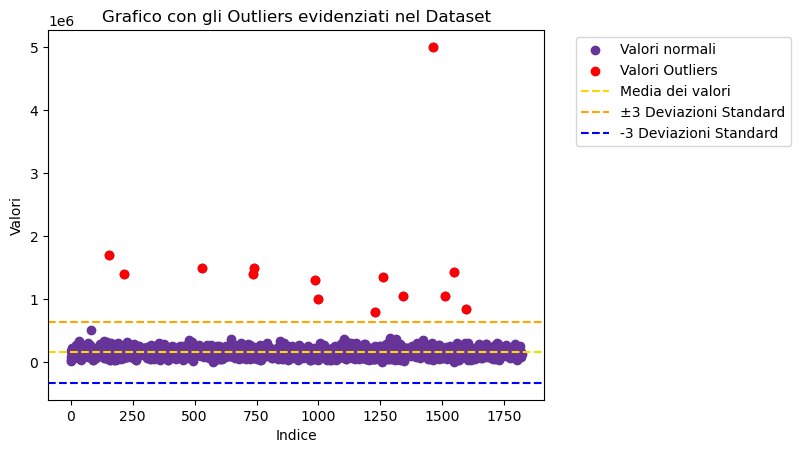

In [35]:
# Crea un grafico a dispersione
plt.scatter(dataset.index, dataset['salary'], label='Valori normali', color="rebeccapurple")

# Evidenzia gli outliers nel grafico con un colore diverso
plt.scatter(outliers_dataset.index, outliers_dataset['salary'], color='red', label='Valori Outliers')

# Aggiungi la media e la deviazione standard al grafico
plt.axhline(y=mean_value_dataset, color='gold', linestyle='--', label='Media dei valori')
plt.axhline(y=mean_value_dataset + 3 * std_dev_dataset, color='orange', linestyle='--', label='±3 Deviazioni Standard')
plt.axhline(y=mean_value_dataset - 3 * std_dev_dataset, color='blue', linestyle='--', label='-3 Deviazioni Standard')

# Aggiungi etichette e legenda al grafico
plt.xlabel('Indice')
plt.ylabel('Valori')
plt.title('Grafico con gli Outliers evidenziati nel Dataset')
plt.legend(bbox_to_anchor=(1.05, 1), loc='upper left')

# Mostra il grafico
plt.show()

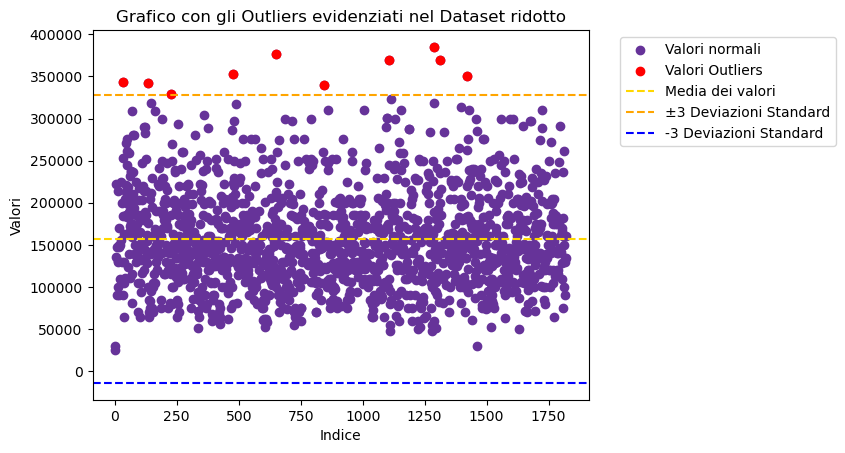

In [36]:
# Crea un grafico a dispersione
plt.scatter(dataset_ridotto.index, dataset_ridotto['salary'], label='Valori normali', color="rebeccapurple")

# Evidenzia gli outliers nel grafico con un colore diverso
plt.scatter(outliers_dataset_ridotto.index, outliers_dataset_ridotto['salary'], color='red', label='Valori Outliers')

# Aggiungi la media e la deviazione standard al grafico
plt.axhline(y=mean_value_dataset_ridotto, color='gold', linestyle='--', label='Media dei valori')
plt.axhline(y=mean_value_dataset_ridotto + 3 * std_dev_dataset_ridotto, color='orange', linestyle='--', label='±3 Deviazioni Standard')
plt.axhline(y=mean_value_dataset_ridotto - 3 * std_dev_dataset_ridotto, color='blue', linestyle='--', label='-3 Deviazioni Standard')

# Aggiungi etichette e legenda al grafico
plt.xlabel('Indice')
plt.ylabel('Valori')
plt.title('Grafico con gli Outliers evidenziati nel Dataset ridotto')
plt.legend(bbox_to_anchor=(1.05, 1), loc='upper left')

# Mostra il grafico
plt.show()

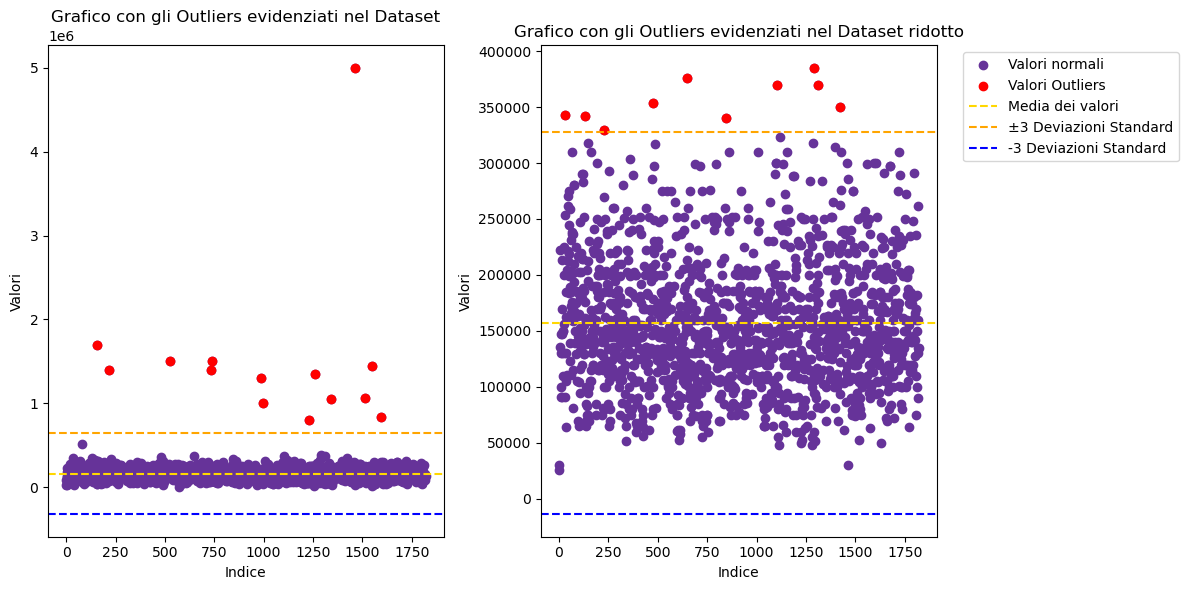

In [37]:
# Importa la libreria matplotlib
import matplotlib.pyplot as plt

# Crea una figura e due assi (subplot)
fig, axs = plt.subplots(1, 2, figsize=(12, 6))

# Grafico con outliers nel dataset originale
axs[0].scatter(dataset.index, dataset['salary'], label='Valori normali', color="rebeccapurple")
axs[0].scatter(outliers_dataset.index, outliers_dataset['salary'], color='red', label='Valori Outliers')
axs[0].axhline(y=mean_value_dataset, color='gold', linestyle='--', label='Media dei valori')
axs[0].axhline(y=mean_value_dataset + 3 * std_dev_dataset, color='orange', linestyle='--', label='±3 Deviazioni Standard')
axs[0].axhline(y=mean_value_dataset - 3 * std_dev_dataset, color='blue', linestyle='--', label='-3 Deviazioni Standard')
axs[0].set_xlabel('Indice')
axs[0].set_ylabel('Valori')
axs[0].set_title('Grafico con gli Outliers evidenziati nel Dataset')

# Grafico con outliers nel dataset ridotto
axs[1].scatter(dataset_ridotto.index, dataset_ridotto['salary'], label='Valori normali', color="rebeccapurple")
axs[1].scatter(outliers_dataset_ridotto.index, outliers_dataset_ridotto['salary'], color='red', label='Valori Outliers')
axs[1].axhline(y=mean_value_dataset_ridotto, color='gold', linestyle='--', label='Media dei valori')
axs[1].axhline(y=mean_value_dataset_ridotto + 3 * std_dev_dataset_ridotto, color='orange', linestyle='--', label='±3 Deviazioni Standard')
axs[1].axhline(y=mean_value_dataset_ridotto - 3 * std_dev_dataset_ridotto, color='blue', linestyle='--', label='-3 Deviazioni Standard')
axs[1].set_xlabel('Indice')
axs[1].set_ylabel('Valori')
axs[1].set_title('Grafico con gli Outliers evidenziati nel Dataset ridotto')
plt.legend(bbox_to_anchor=(1.05, 1), loc='upper left')

# Regola la disposizione e lo spazio tra i subplot
plt.tight_layout()

# Mostra i grafici
plt.show()

In [38]:
# Definisci il numero minimo di features che devono superare la soglia per considerare un dato un outlier
min_features_threshold = 1
k = 3  # intervallo di confidenza

# Lista per salvare gli indici degli outliers
outlier_indices_dataset = []

# Calcola la media e la deviazione standard della feature "salary"
mean_salary_dataset = dataset['salary'].mean()
std_dev_salary_dataset = dataset['salary'].std()

# Identifica gli outliers per la feature "salary"
dataset['Outlier_salary'] = (dataset['salary'] > mean_salary_dataset + k * std_dev_salary_dataset) | (dataset['salary'] < mean_salary_dataset - k * std_dev_salary_dataset)

dataset

,experience_level,job_title,salary,company_location,Outlier_salary
0,SE,Principal Data Scientist,80000,ES,False
1,MI,ML Engineer,30000,US,False
2,MI,ML Engineer,25500,US,False
3,SE,Data Scientist,175000,CA,False
4,SE,Data Scientist,120000,CA,False
...,...,...,...,...,...
1815,SE,Machine Learning Engineer,134500,US,False
1817,MI,Data Scientist,130000,US,False
1818,MI,Data Scientist,90000,US,False
1819,EN,Data Engineer,160000,US,False


In [39]:
# Definisci il numero minimo di features che devono superare la soglia per considerare un dato un outlier
min_features_threshold = 1
k = 3  # intervallo di confidenza

# Lista per salvare gli indici degli outliers
outlier_indices_dataset_ridotto = []

# Calcola la media e la deviazione standard della feature "salary"
mean_salary_dataset_ridotto = dataset_ridotto['salary'].mean()
std_dev_salary_dataset_ridotto = dataset_ridotto['salary'].std()

# Identifica gli outliers per la feature "salary"
dataset_ridotto['Outlier_salary'] = (dataset_ridotto['salary'] > mean_salary_dataset_ridotto + k * std_dev_salary_dataset_ridotto) | (dataset_ridotto['salary'] < mean_salary_dataset_ridotto - k * std_dev_salary_dataset_ridotto)

dataset_ridotto

,experience_level,job_title,salary,company_location,Outlier_salary
1,MI,ML Engineer,30000,US,False
2,MI,ML Engineer,25500,US,False
5,SE,Applied Scientist,222200,US,False
6,SE,Applied Scientist,136000,US,False
9,SE,Data Scientist,147100,US,False
...,...,...,...,...,...
1815,SE,Machine Learning Engineer,134500,US,False
1817,MI,Data Scientist,130000,US,False
1818,MI,Data Scientist,90000,US,False
1819,EN,Data Engineer,160000,US,False


In [40]:
#Elimina le righe corrispondenti agli outliers quelli che hanno una features fuoriscala
outliers_dataset = dataset['Num_Outliers_nella_riga'] = dataset.filter(like='Outlier_').sum(axis=1)
dataset

,experience_level,job_title,salary,company_location,Outlier_salary,Num_Outliers_nella_riga
0,SE,Principal Data Scientist,80000,ES,False,0
1,MI,ML Engineer,30000,US,False,0
2,MI,ML Engineer,25500,US,False,0
3,SE,Data Scientist,175000,CA,False,0
4,SE,Data Scientist,120000,CA,False,0
...,...,...,...,...,...,...
1815,SE,Machine Learning Engineer,134500,US,False,0
1817,MI,Data Scientist,130000,US,False,0
1818,MI,Data Scientist,90000,US,False,0
1819,EN,Data Engineer,160000,US,False,0


In [41]:
#Elimina le righe corrispondenti agli outliers quelli che hanno una features fuoriscala
outliers_dataset_ridotto = dataset_ridotto['Num_Outliers_nella_riga'] = dataset_ridotto.filter(like='Outlier_').sum(axis=1)
dataset_ridotto

,experience_level,job_title,salary,company_location,Outlier_salary,Num_Outliers_nella_riga
1,MI,ML Engineer,30000,US,False,0
2,MI,ML Engineer,25500,US,False,0
5,SE,Applied Scientist,222200,US,False,0
6,SE,Applied Scientist,136000,US,False,0
9,SE,Data Scientist,147100,US,False,0
...,...,...,...,...,...,...
1815,SE,Machine Learning Engineer,134500,US,False,0
1817,MI,Data Scientist,130000,US,False,0
1818,MI,Data Scientist,90000,US,False,0
1819,EN,Data Engineer,160000,US,False,0


In [42]:
# Filtra i dati per mantenere solo le righe con almeno il numero minimo di features superanti la soglia
outliers_dataset = dataset[dataset['Num_Outliers_nella_riga'] >= min_features_threshold]
outliers_dataset

,experience_level,job_title,salary,company_location,Outlier_salary,Num_Outliers_nella_riga
156,MI,Applied Data Scientist,1700000,IN,True,1
217,EN,Data Engineer,1400000,IN,True,1
528,SE,AI Scientist,1500000,IL,True,1
735,MI,Data Scientist,1400000,IN,True,1
738,MI,Lead Data Analyst,1500000,IN,True,1
988,SE,Data Analyst,1300000,IN,True,1
998,SE,Data Science Consultant,1000000,TH,True,1
1230,EN,Data Scientist,800000,IN,True,1
1260,MI,Product Data Analyst,1350000,IN,True,1
1341,EN,Data Scientist,1050000,IN,True,1


In [43]:
# Filtra i dati per mantenere solo le righe con almeno il numero minimo di features superanti la soglia
outliers_dataset_ridotto = dataset_ridotto[dataset_ridotto['Num_Outliers_nella_riga'] >= min_features_threshold]
outliers_dataset_ridotto

,experience_level,job_title,salary,company_location,Outlier_salary,Num_Outliers_nella_riga
33,SE,Computer Vision Engineer,342810,US,True,1
133,SE,Machine Learning Engineer,342300,US,True,1
228,EX,Head of Data,329500,US,True,1
478,EX,Director of Data Science,353200,US,True,1
649,SE,Data Architect,376080,US,True,1
845,MI,Research Scientist,340000,US,True,1
1105,SE,Data Scientist,370000,US,True,1
1288,SE,Data Analyst,385000,US,True,1
1311,SE,Research Scientist,370000,US,True,1
1421,SE,Applied Scientist,350000,US,True,1


In [44]:
# Aggiungi una colonna che indica se il record è un outlier o meno
dataset['Is_Outlier'] = dataset.index.isin(outliers_dataset.index)
dataset

,experience_level,job_title,salary,company_location,Outlier_salary,Num_Outliers_nella_riga,Is_Outlier
0,SE,Principal Data Scientist,80000,ES,False,0,False
1,MI,ML Engineer,30000,US,False,0,False
2,MI,ML Engineer,25500,US,False,0,False
3,SE,Data Scientist,175000,CA,False,0,False
4,SE,Data Scientist,120000,CA,False,0,False
...,...,...,...,...,...,...,...
1815,SE,Machine Learning Engineer,134500,US,False,0,False
1817,MI,Data Scientist,130000,US,False,0,False
1818,MI,Data Scientist,90000,US,False,0,False
1819,EN,Data Engineer,160000,US,False,0,False


In [45]:
# Aggiungi una colonna che indica se il record è un outlier o meno
dataset_ridotto['Is_Outlier'] = dataset_ridotto.index.isin(outliers_dataset_ridotto.index)
dataset_ridotto

,experience_level,job_title,salary,company_location,Outlier_salary,Num_Outliers_nella_riga,Is_Outlier
1,MI,ML Engineer,30000,US,False,0,False
2,MI,ML Engineer,25500,US,False,0,False
5,SE,Applied Scientist,222200,US,False,0,False
6,SE,Applied Scientist,136000,US,False,0,False
9,SE,Data Scientist,147100,US,False,0,False
...,...,...,...,...,...,...,...
1815,SE,Machine Learning Engineer,134500,US,False,0,False
1817,MI,Data Scientist,130000,US,False,0,False
1818,MI,Data Scientist,90000,US,False,0,False
1819,EN,Data Engineer,160000,US,False,0,False


In [46]:
# Rimuovi colonne ausiliarie
dataset.drop(dataset.filter(like='Outlier_').columns, axis=1, inplace=True)
dataset.drop('Num_Outliers_nella_riga', axis=1, inplace=True)
dataset

,experience_level,job_title,salary,company_location,Is_Outlier
0,SE,Principal Data Scientist,80000,ES,False
1,MI,ML Engineer,30000,US,False
2,MI,ML Engineer,25500,US,False
3,SE,Data Scientist,175000,CA,False
4,SE,Data Scientist,120000,CA,False
...,...,...,...,...,...
1815,SE,Machine Learning Engineer,134500,US,False
1817,MI,Data Scientist,130000,US,False
1818,MI,Data Scientist,90000,US,False
1819,EN,Data Engineer,160000,US,False


In [47]:
# Rimuovi colonne ausiliarie
dataset_ridotto.drop(dataset_ridotto.filter(like='Outlier_').columns, axis=1, inplace=True)
dataset_ridotto.drop('Num_Outliers_nella_riga', axis=1, inplace=True)
dataset_ridotto

,experience_level,job_title,salary,company_location,Is_Outlier
1,MI,ML Engineer,30000,US,False
2,MI,ML Engineer,25500,US,False
5,SE,Applied Scientist,222200,US,False
6,SE,Applied Scientist,136000,US,False
9,SE,Data Scientist,147100,US,False
...,...,...,...,...,...
1815,SE,Machine Learning Engineer,134500,US,False
1817,MI,Data Scientist,130000,US,False
1818,MI,Data Scientist,90000,US,False
1819,EN,Data Engineer,160000,US,False


In [48]:
dataset_filtered = dataset[dataset['Is_Outlier'] == False ]
dataset_filtered

,experience_level,job_title,salary,company_location,Is_Outlier
0,SE,Principal Data Scientist,80000,ES,False
1,MI,ML Engineer,30000,US,False
2,MI,ML Engineer,25500,US,False
3,SE,Data Scientist,175000,CA,False
4,SE,Data Scientist,120000,CA,False
...,...,...,...,...,...
1815,SE,Machine Learning Engineer,134500,US,False
1817,MI,Data Scientist,130000,US,False
1818,MI,Data Scientist,90000,US,False
1819,EN,Data Engineer,160000,US,False


In [49]:
dataset_ridotto_filtered = dataset_ridotto[dataset_ridotto['Is_Outlier'] == False ]
dataset_ridotto_filtered

,experience_level,job_title,salary,company_location,Is_Outlier
1,MI,ML Engineer,30000,US,False
2,MI,ML Engineer,25500,US,False
5,SE,Applied Scientist,222200,US,False
6,SE,Applied Scientist,136000,US,False
9,SE,Data Scientist,147100,US,False
...,...,...,...,...,...
1815,SE,Machine Learning Engineer,134500,US,False
1817,MI,Data Scientist,130000,US,False
1818,MI,Data Scientist,90000,US,False
1819,EN,Data Engineer,160000,US,False


## FASE 8: LO SCALING ED ENCODING DEI DATI NELLE FEATURE (CON I GRAFICI)

In [54]:
# Escludi le colonne non numeriche dal DataFrame
numeric_columns = dataset_ridotto_filtered.select_dtypes(include=['number']).columns
dataset_numeric = dataset_ridotto_filtered[numeric_columns]

# Min-Max scaling solo delle colonne numeriche
min_max_scaler = MinMaxScaler()
min_max_scaled_data = min_max_scaler.fit_transform(dataset_numeric)
min_max_scaled_dataset_numeric = pd.DataFrame(min_max_scaled_data, columns=dataset_numeric.columns)

# Concatena le colonne non numeriche con quelle scalate
non_numeric_columns = dataset_ridotto_filtered.select_dtypes(exclude=['number']).columns
min_max_scaled_dataset_ridotto_filtered = pd.concat([min_max_scaled_dataset_numeric, dataset_ridotto_filtered[non_numeric_columns]], axis=1)

# Visualizza i DataFrame dopo lo scaling
print("\nDataFrame ridotto filtrato dopo Min-Max scaling:")
min_max_scaled_dataset_ridotto_filtered



DataFrame ridotto filtrato dopo Min-Max scaling:


,salary,experience_level,job_title,company_location,Is_Outlier
0,0.015111,NaN,NaN,NaN,NaN
1,0.000000,MI,ML Engineer,US,False
2,0.660510,MI,ML Engineer,US,False
3,0.371054,NaN,NaN,NaN,NaN
4,0.408328,NaN,NaN,NaN,NaN
...,...,...,...,...,...
1815,NaN,SE,Machine Learning Engineer,US,False
1817,NaN,MI,Data Scientist,US,False
1818,NaN,MI,Data Scientist,US,False
1819,NaN,EN,Data Engineer,US,False


In [53]:
# Escludi le colonne non numeriche dal DataFrame
numeric_columns = dataset_filtered.select_dtypes(include=['number']).columns
dataset_numeric = dataset_filtered[numeric_columns]

# Min-Max scaling solo delle colonne numeriche
min_max_scaler = MinMaxScaler()
min_max_scaled_data = min_max_scaler.fit_transform(dataset_numeric)
min_max_scaled_dataset_numeric = pd.DataFrame(min_max_scaled_data, columns=dataset_numeric.columns)

# Concatena le colonne non numeriche con quelle scalate
non_numeric_columns = dataset_filtered.select_dtypes(exclude=['number']).columns
min_max_scaled_dataset_filtered = pd.concat([min_max_scaled_dataset_numeric, dataset_filtered[non_numeric_columns]], axis=1)

# Visualizza i DataFrame dopo lo scaling
print("\nDataFrame filtrato dopo Min-Max scaling:")
min_max_scaled_dataset_filtered



DataFrame ridotto  dopo Min-Max scaling:


,salary,experience_level,job_title,company_location,Is_Outlier
0,0.145129,SE,Principal Data Scientist,ES,False
1,0.045726,MI,ML Engineer,US,False
2,0.036779,MI,ML Engineer,US,False
3,0.333996,SE,Data Scientist,CA,False
4,0.224652,SE,Data Scientist,CA,False
...,...,...,...,...,...
1815,NaN,SE,Machine Learning Engineer,US,False
1817,NaN,MI,Data Scientist,US,False
1818,NaN,MI,Data Scientist,US,False
1819,NaN,EN,Data Engineer,US,False


## FASE 9: LO SPLITTING DATASET

In [ ]:
import numpy as np
from sklearn.model_selection import train_test_split # in questo caso viene solo importata una parte di libreria poichè è strettamente necessaria quella determinata funzione
# Suddividere il dataset in training set (70%) e test set (30%) formando due DataSet
X_train, X_test, y_train, y_test = train_test_split(salary, job_title, test_size=0.3, random_state=42) # riprendendo la formula di prima: le X sono i valori delle altezze perchè sono le Feature del DataSet, cioè l'input. Invece le Y sono gli output o target del DataSet, cioè i valori dei pesi. "test_size=0.3" vuol dire che il DataSet di Test è il 30% di quello totale mentre random_state sceglie in modo randomico i valori del DataSet per il Training e il Test
# Stampare le dimensioni dei training set e test set
print("Dimensioni del Training Set (salary e job title):", X_train.shape, y_train.shape) # shape = dimensione dei DataSet di Training
print("Dimensioni del Test Set (salary e job title):", X_test.shape, y_test.shape) # shape = dimensione dei DataSet di Test